In [1]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:020m


In [2]:
!pip install matplotlib

In [1]:
import tensorflow as tf
import os

2023-11-28 20:35:46.059100: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 20:35:46.497108: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 20:35:46.499365: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 20:35:50.111688: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import cv2

In [3]:
import imghdr

/tmp/ipykernel_3861054/336752527.py:1: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'data'


In [5]:
image_exts=['jpeg','jpg','bmp','png']


In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in exist list {}".format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue image with {}'.format(image_path))

In [7]:
import numpy as np

In [8]:
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 169 files belonging to 2 classes.


In [10]:
data_iterator= data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

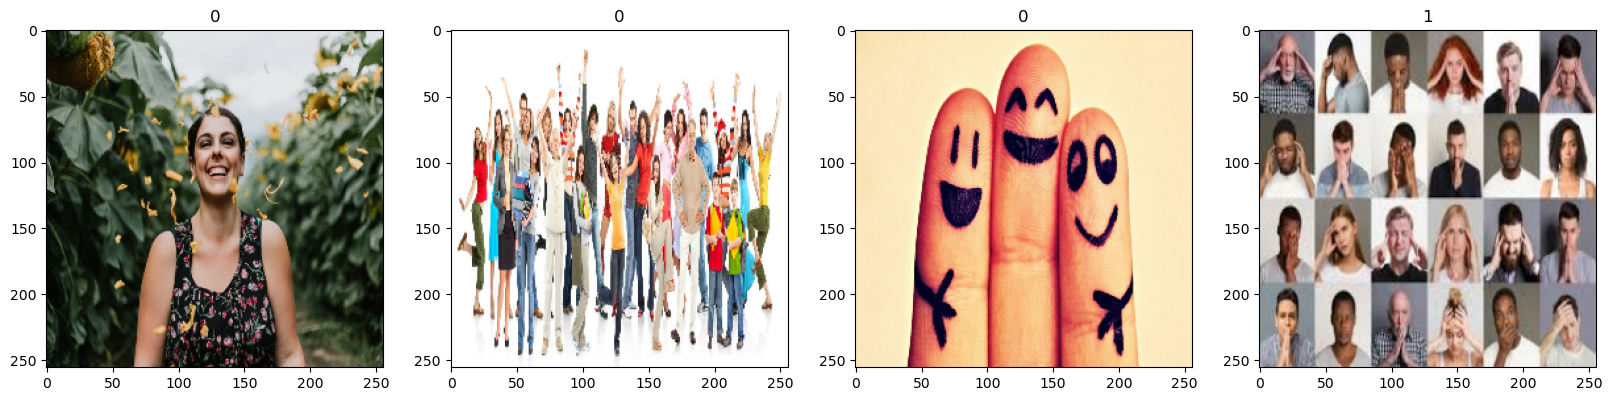

In [12]:
fig,ax =plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])